In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Necessary Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

LOADING TRAIN DATASET


In [ ]:
# Load the dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

PERFORMING EDA

In [ ]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Display the missing values for each column
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 x    0
y    1
dtype: int64


In [ ]:
# Handling missing values by checking where they are and dropping the missing row for further analysis
data_cleaned = data.dropna()

In [ ]:
# Summary statistics
summary_stats = data_cleaned.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                 x           y
count  699.000000  699.000000
mean    50.014306   49.939869
std     28.954560   29.109217
min      0.000000   -3.839981
25%     25.000000   24.929968
50%     49.000000   48.973020
75%     75.000000   74.929911
max    100.000000  108.871618


In [ ]:
# Visualizing the distribution of x and y
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

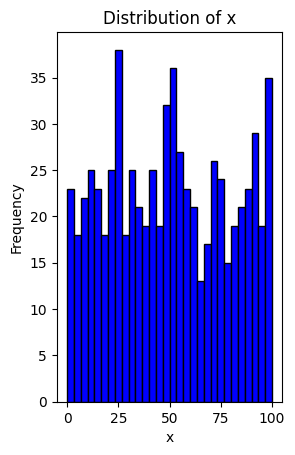

In [ ]:
# Plotting histogram of x
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['x'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of x')
plt.xlabel('x')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

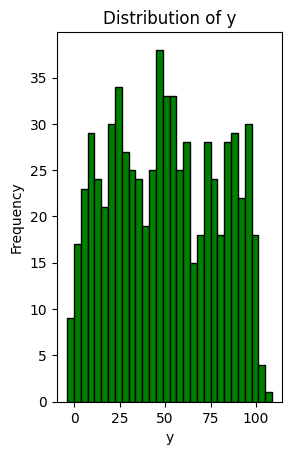

In [ ]:
# Plotting histogram of y
plt.subplot(1, 2, 2)
plt.hist(data_cleaned['y'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Frequency')


In [ ]:
# Checking correlation
correlation = data_cleaned.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
          x        y
x  1.00000  0.99534
y  0.99534  1.00000


MACHINE LEARNING ALGORITHM

In [ ]:
# Prepare the data for linear regression
X = data_cleaned[['x']]
y = data_cleaned['y']

In [ ]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Coefficients of the linear regression model
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 1.000656381856304
Intercept: -0.10726546430097272


In [ ]:
# Calculating R-squared value on training data
r_squared = model.score(X, y)
print(f"R-squared (Training Data): {r_squared}")

R-squared (Training Data): 0.9907015319025518


In [ ]:
# Load the test dataset
test_file_path = '/content/test.csv'
test_data = pd.read_csv(test_file_path)

In [ ]:

# Predicting y for the test dataset
X_test = test_data[['x']]
y_test_pred = model.predict(X_test) #the model will predict using input x




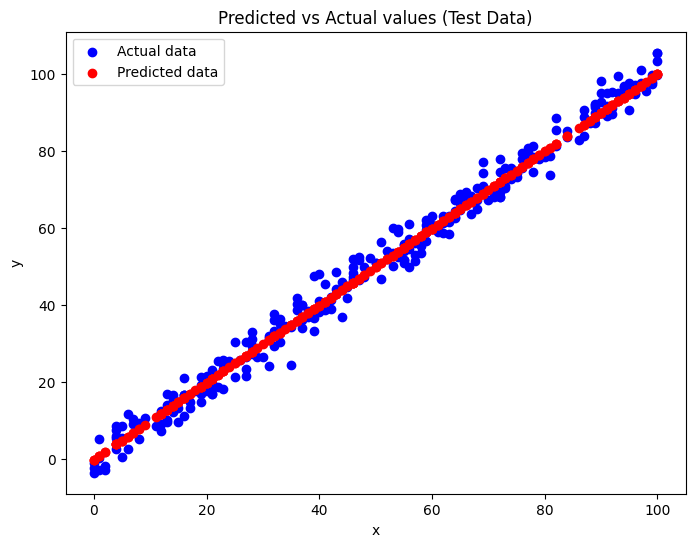

In [ ]:
# If the test dataset contains actual y values, compare them
if 'y' in test_data.columns:
    y_test_actual = test_data['y']


    # Plotting the predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test_actual, color='blue', label='Actual data')
    plt.scatter(X_test, y_test_pred, color='red', label='Predicted data')
    plt.title('Predicted vs Actual values (Test Data)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
else:
    # If actual y values are not available, just print predicted values
    print("Predicted values:\n", y_test_pred)

In [ ]:
# Calculate how well the model's predictions (y_test_pred) match the real answers (y_test_actual)
test_r_squared = model.score(X_test, y_test_actual)
print(f"R-squared (Test Data): {test_r_squared}")

R-squared (Test Data): 0.9888014444327563
